In [19]:
import json
import requests
from skimage import io

In [20]:
with open("./data/sneaker_info.json") as f:
    sneaker_info = json.load(f)
    
list(sneaker_info.items())[0]

('Jordan Zoom Zero Gravity',
 {'lowestResellPrice': {'stockX': 169, 'flightClub': 89, 'goat': 89},
  'imageLinks': [],
  '_id': '64965a8f6e23710021feb212',
  'shoeName': "Nike Court Air Zoom Zero Aqua (Women's)",
  'brand': 'Nike',
  'silhoutte': 'Nike Court Air Zoom Zero',
  'styleID': 'CQ4481-100',
  'make': 'Nike Court Air Zoom Zero',
  'colorway': 'White/Bright Concord-Aquatone-Varsity Red',
  'retailPrice': 190,
  'thumbnail': 'https://images.stockx.com/images/Nike-Court-Air-Jordan-8-White-Aqua-W.png?fit=fill&bg=FFFFFF&w=700&h=500&fm=webp&auto=compress&trim=color&q=90&dpr=2&updated_at=1626904166',
  'releaseDate': '2019-08-26',
  'description': "Created for professional tennis player Sloane Stephens, the NikeCourt Air Zoom Zero x Wmns Air Jordan 8 'Aqua' is a hybrid silhouette that blends retro basketball style with contemporary tennis performance. An Air Jordan 8 upper, complete with a chenille tongue and cross-strap closure, is finished in the women's-specific White Aqua colorwa

In [22]:
from skimage import io
import matplotlib.pyplot as plt
import re

img_paths = []
for key, val in sneaker_info.items():
    sneaker_str = re.sub(r'[^A-Za-z0-9 ]+', ' ', key)
    sneaker_str = re.sub(' +', ' ', sneaker_str).strip()
    img_name = sneaker_str.replace(' ', '-').lower()
    print(img_name)
    img_url = val['thumbnail']
    response = requests.get(img_url)
    fpath = f'{img_name}.jpg'
    with open(f'images/{fpath}', 'wb') as f:
        f.write(response.content)
        img_paths.append(fpath)

jordan-zoom-zero-gravity
jordan-react-havoc-paris-saint-germain-psg
nike-tanjun-in-midnight-navy-game-royal-white
nike-air-huarache-premium-varsity-jacket-in-red
odyssey-react-2-flyknit-black-racer-blue
eric-koston-air-jordan-1-low-powder-blue
jimmy-choo-diamond-x-strap-f-leather-sneakers
nike-blazer-low-x-white-light-photo-blue
eric-koston-x-air-jordan-1-low-sb-powder-blue
nike-waffle-one-summer-of-sports-pack
asic-mexico-66-kill-bill
nike-air-jordan-3-muslin
nike-air-jordan-5-chinese-new-year
nike-air-jordan-1-low-light-smoke-grey
nike-air-jordan-1-low-white-camo
air-jordan-13-lucky-green
nike-phantom-vision-academy-indoor-turf-soccer-shoes
new-balance-515-sport-v2-white-pigment-red-ml515otx
nike-jordan-delta-breathe
nike-air-jordan-1-retro-high-og-university-blue
nike-jordan-1-low-mocha
nike-air-huarache-red-oxide
nike-air-jordan-1-low-se-spades


IndexError: list index out of range

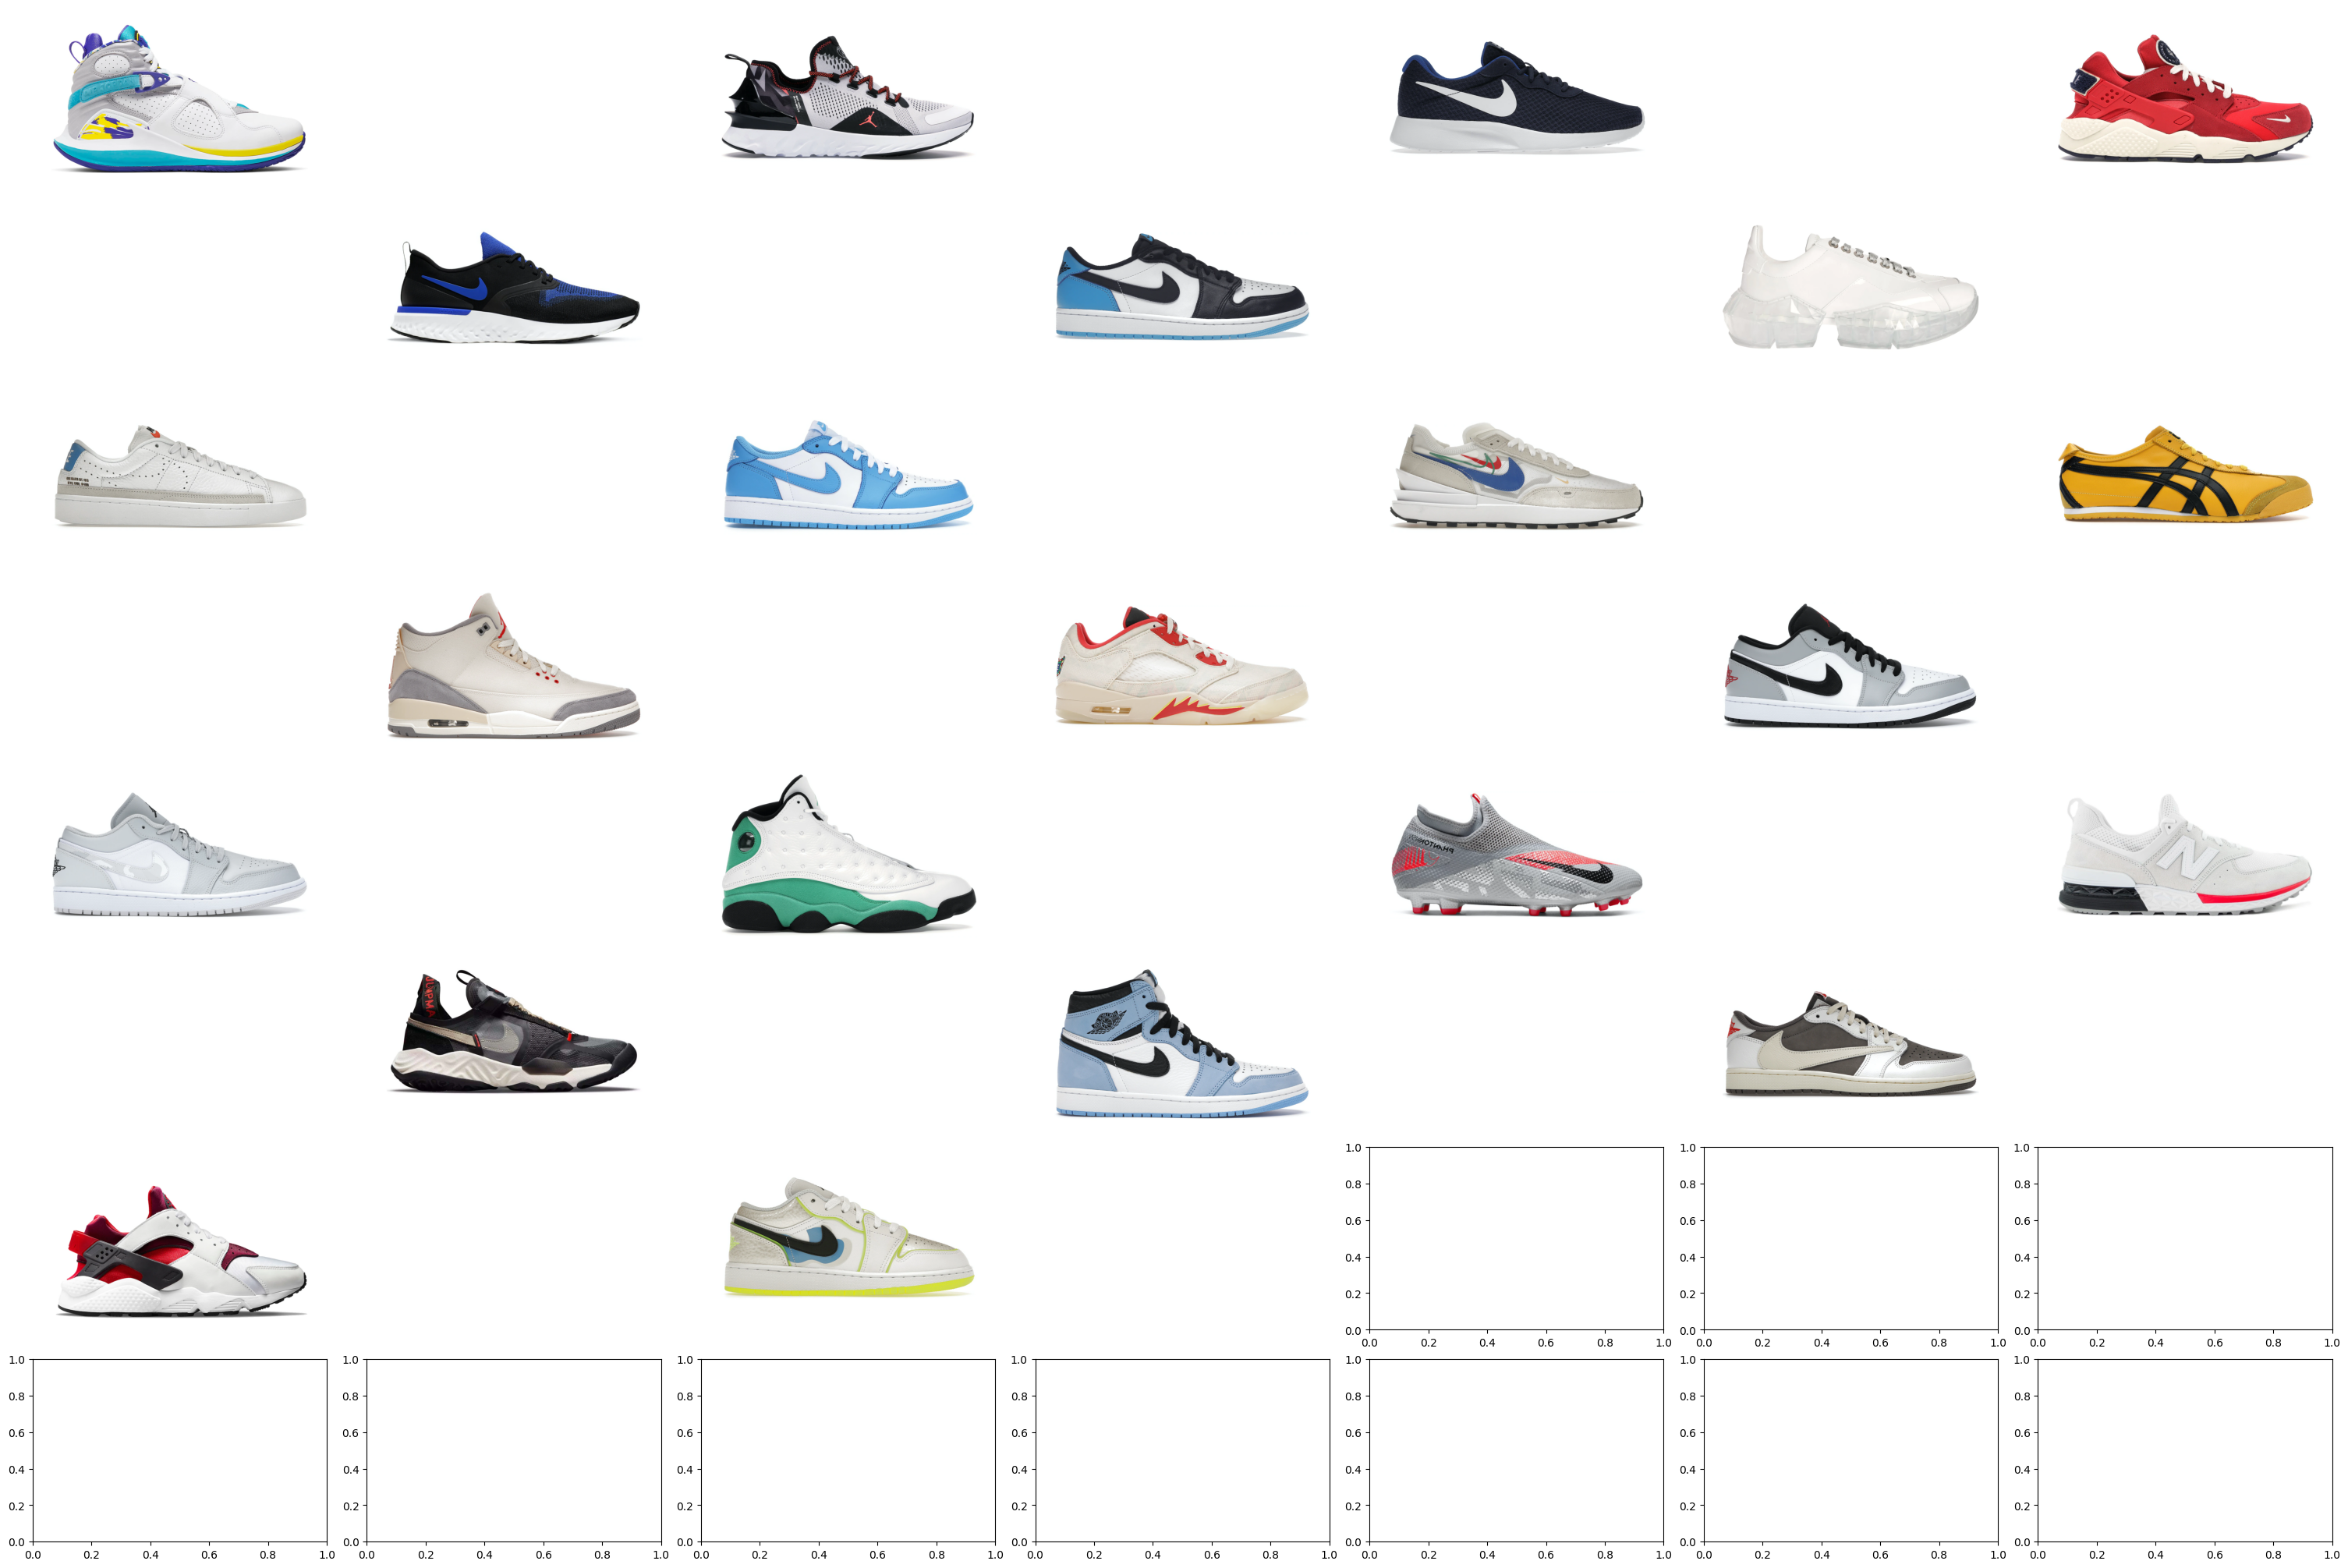

In [23]:
import matplotlib.pyplot as plt
n_row, n_col = (8, 7)
fig, axs = plt.subplots(n_row, n_col, figsize=(30, 20), layout='constrained')
axs = axs.flatten()
imgs = [io.imread(f'./images/{f}') for f in img_paths]
count = 0
for i, ax in enumerate(axs):
    if i % 2 == 0:
        ax.imshow(imgs[count])
        ax.axis('off')
        count += 1
    else:
        fig.delaxes(ax)
fig.savefig('ted-sneaker-portfolio.jpg')